In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Dimensionaly reduction

<ul> 
    <li> <a href ='https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553'>Principal Component Analysis Part 1: The Different Formulations.</a> </li>
    <li> <a href='https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9'>The Mathematics Behind Principal Component Analysis </a> </li>
    <li><a href='https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf'>A TUTORIAL ON PRINCIPAL COMPONENT ANALYSIS</a></li>
    <li><a href='http://www.math.union.edu/~jaureguj/PCA.pdf'>Principal component analysis with linear algebra</a></li>
    <li><a href='https://intoli.com/blog/pca-and-svd/'>SVD and PCA </a> </li>
   <li> <a href='http://www.math.ucsd.edu/~gptesler/283/slides/pca_18-handout.pdf'>Principal Components Analysis (PCA)
        and Singular Value Decomposition (SVD) with applications to Microarrays</a> </li>
    https://datascienceplus.com/understanding-the-covariance-matrix/

<h1>Dimensionaly reduction </h1>

We use dimensionality reduction benefits given below : 
<ul>
    <li>By reducing the dimensions of the features, the space required to store the dataset also gets reduced.</li>
    <li>Less Computation training time is required for reduced dimensions of features</li>
    <li>Reduced dim of features help in visualizing </li>
    <li> It removes the redundant features by taking care of multicollinearity. </li>
 </ul>

Feature Extraction: <br>
Feature extraction is the process of transforming the space containing many dimensions into space with fewer dimensions. This approach is useful when we want to keep the whole information but use fewer resources while processing the information.

Some common feature extraction techniques are:

Principal Component Analysis <br>
Linear Discriminant Analysis <br>
Kernel PCA <br>
Quadratic Discriminant Analysis <br>

<h2> Principle Component Analysis </h2> 

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the 'core' of a PCA.Let's investigate that fact.

<h2> Why Covariance Matrix is so important ? </h2>

<img src="https://www.statisticshowto.com/wp-content/uploads/2013/12/g-covariance.gif" alt="Italian Trulli">
Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.
Covariance can be positive, zero, or negative.
Positive indicates that there’s an overall tendency
that when one variable increases, so doe the other,
while negative indicates an overall tendency that
when one increases the other decreases.
If X and Y are independent variables, then their
covariance is 0.The converse, however, is not always true.
Cov(X, Y ) can be 0 for variables that are not independent.
The covariance between two ranodom variable X,Y is given by :
  $$Cov(X, Y ) = \sigma(X, Y) = \frac{1}{n-1}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})$$
  where $n$ is the number of samples and $\bar{x}$  is the mean of the random variable $x$

For dataset $X$ where $X \in R^{n\times d}$ $n$ samples and $d$ features.The covariance matrix can be expressed
$$C= \frac{1}{n-1}(X_i - \bar{X})(X_i - \bar{X})^T $$

If the mean $\bar{X}$ of dataset is $0$ then we can rewrite :<br>
$$ C = \frac{X^TX}{n-1}$$
<br>For this reason in future wee always will perform recentering of data,just shifiting the elements :



Let's generate two  Normal distributed x and y vector with mean 0 and standard deviation 1

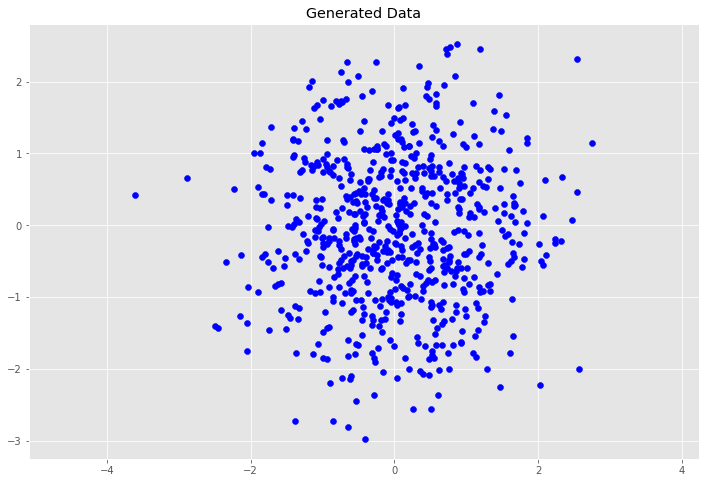

In [67]:
x = np.random.normal(0, 1, 700)
y = np.random.normal(0, 1, 700)
X = np.vstack((x, y)).T
#X =  StandardScaler().fit(X).transform(X) ##centering of data
plt.scatter(X[:, 0], X[:, 1],color='b')
plt.title('Generated Data')
plt.axis('equal');


This case would mean that $x$ and  $y$ are independent (or uncorrelated) and the covariance matrix  $C$ should be somthing 
like : <br> <br>
$$ C = \begin{bmatrix} 
 c_{11} \approx 1 & c_{12}  \approx 0\\
 c_{21} \approx 0 & c_{22}  \approx 1 \\
\end{bmatrix} == \begin{bmatrix} 
 \sigma_x^2 &  0 \\
  0 & \sigma_y^2 \\
\end{bmatrix} $$

Let's calculate the covariance matrix :

In [66]:
C = X.T.dot(X)/(len(X)-1)
C

array([[1.11592167, 0.05018267],
       [0.05018267, 0.95150252]])